In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sqlalchemy import create_engine
from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine("postgresql://{}:{}@{}:{}/{}".format(postgres_user, postgres_pw, postgres_host,
                                                            postgres_port, postgres_db))

In [3]:
students_df = pd.read_sql('select * from studentsperformance', con = engine)
engine.dispose()

In [4]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
students_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

Text(0.5, 1.0, 'Normality Check for Writing Score')

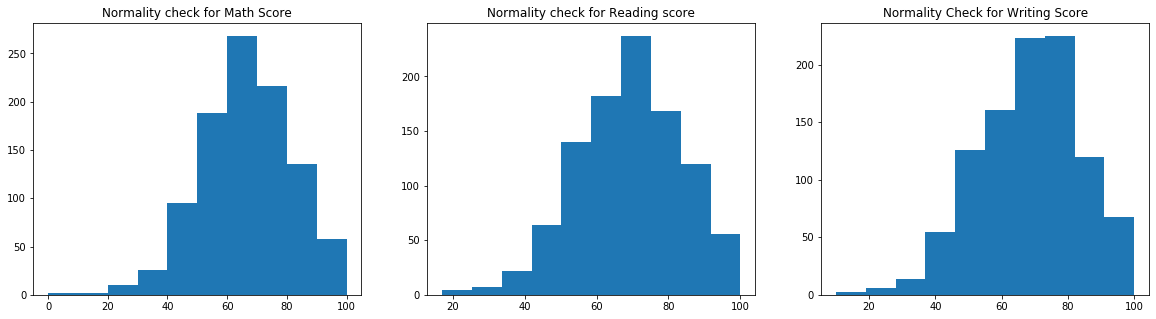

In [6]:
plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
plt.hist(students_df['math score'])
plt.title('Normality check for Math Score')

plt.subplot(1,3,2)
plt.hist(students_df['reading score'])
plt.title('Normality check for Reading score')

plt.subplot(1,3,3)
plt.hist(students_df['writing score'])
plt.title('Normality Check for Writing Score')

## It appears that the data is not normal. Applying box cox transformation for these variables

In [9]:
from scipy.stats import boxcox
math_boxcox = boxcox(students_df[students_df['math score'] > 0]['math score'])
reading_boxcox = boxcox(students_df['reading score'])
writing_boxcox = boxcox(students_df['writing score'])

Text(0.5, 1.0, 'Normality Check for Writing Boxcox')

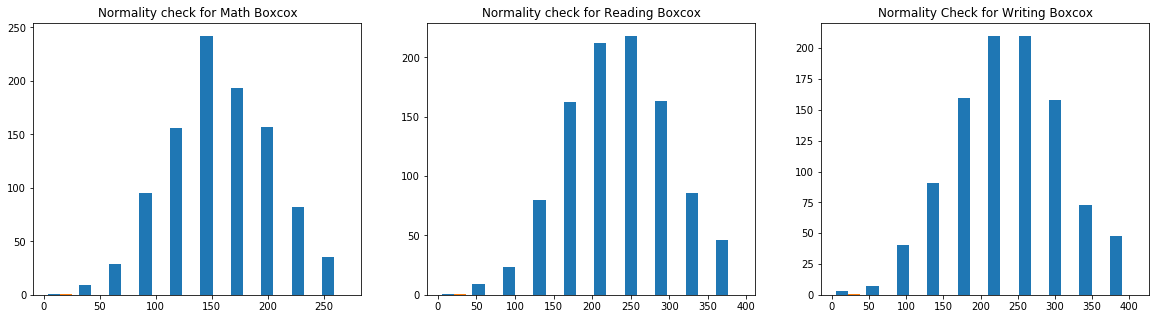

In [10]:
plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
plt.hist(math_boxcox)
plt.title('Normality check for Math Boxcox')

plt.subplot(1,3,2)
plt.hist(reading_boxcox)
plt.title('Normality check for Reading Boxcox')

plt.subplot(1,3,3)
plt.hist(writing_boxcox)
plt.title('Normality Check for Writing Boxcox')

## 2.Some machine learning models assume the target variable to be normally distributed. In order to use these models, we may need to transform our target to be normally distributed.

In [19]:
jb_stats = jarque_bera(students_df['math score'])
norm_stats = normaltest(students_df['math score'])

print("Jarque-Bera Test statistics for math score is {} and the p-value is {}".format(jb_stats[0], jb_stats[1]))
print("The Normality Test statistics for Math score is {} and the p-value is {}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(students_df['reading score'])
norm_stats = normaltest(students_df['reading score'])

print("Jarque-Bera Test statistic for reading score is {} and p-value is {}".format(jb_stats[0], norm_stats[1]))
print("The normal test stat for reading score is {} and the p-value is {}".format(norm_stats[0], norm_stats[1]))


jb_stats = jarque_bera(students_df['writing score'])
norm_stats = normaltest(students_df['writing score'])

print("Jarque-Bera Test statistic for writing score is {} and p-value is {}".format(jb_stats[0], norm_stats[1]))
print("The normal test stat for writing score is {} and the p-value is {}".format(norm_stats[0], norm_stats[1]))


Jarque-Bera Test statistics for math score is 15.912256686712709 and the p-value is 0.0003505075386818213
The Normality Test statistics for Math score is 15.408960513931822 and the p-value is 0.00045080293869937836
Jarque-Bera Test statistic for reading score is 11.383300575987892 and p-value is 0.003853758403576582
The normal test stat for reading score is 11.11741279628622 and the p-value is 0.003853758403576582
Jarque-Bera Test statistic for writing score is 13.98509448257235 and p-value is 0.0011101885439899974
The normal test stat for writing score is 13.606450837263859 and the p-value is 0.0011101885439899974


### The data has been normalized using the box cox test and the p-values indicate that the data is normally distributed

## Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

In [24]:
exam_score = (students_df['math score']+students_df['reading score']+ students_df['writing score'])/3

(array([  1.,   5.,  12.,  40., 124., 178., 262., 210., 122.,  46.]),
 array([  9. ,  18.1,  27.2,  36.3,  45.4,  54.5,  63.6,  72.7,  81.8,
         90.9, 100. ]),
 <a list of 10 Patch objects>)

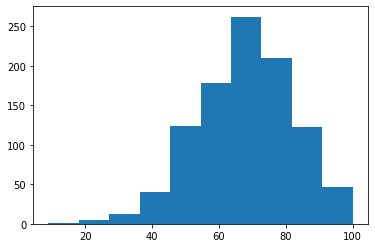

In [26]:
plt.hist(exam_score)

In [27]:
jbstats_exam = jarque_bera(exam_score)
normtest_exam = normaltest(exam_score)

In [28]:
print(jbstats_exam)
print(normtest_exam)

(15.453387913085168, 0.00044089934264401887)
NormaltestResult(statistic=15.186721327231322, pvalue=0.0005037851534494478)


In [34]:
exam_boxcox, _ = boxcox(exam_score)

(array([  4.,  14.,  36., 123., 167., 222., 204., 128.,  73.,  29.]),
 array([ 14.97225502,  60.0201109 , 105.06796677, 150.11582265,
        195.16367852, 240.2115344 , 285.25939027, 330.30724615,
        375.35510202, 420.4029579 , 465.45081377]),
 <a list of 10 Patch objects>)

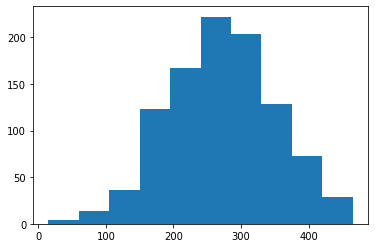

In [35]:
plt.hist(exam_boxcox)

In [37]:
jbstats_boxcox = jarque_bera(exam_boxcox)
normtest_boxcox = normaltest(exam_boxcox) 

In [38]:
print(jbstats_boxcox)
print(normtest_boxcox)

(2.4353989331279, 0.2959101356398447)
NormaltestResult(statistic=2.779857602227616, pvalue=0.24909303914726724)


## After using the boxcox the data appears to be normal